[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1vTbbnTw0o4nD8DLr0NB_5jDmTQ4s31lf?usp=sharing)

# **Week 4 - Introduction to Probabilistic Regression**

## **Abstract**

1.  **Introduction to Probabilistic Regression**: Probablistic Regression estimates the uncertainty of predicitions made by the model. This is done by integrating prior beliefs about the model parameters into the model.  

2. **Introduction to Bayes' Theorem to Regression**: Bayes' Theorem to Regression is a method of linear regression using probability distributions rather than point estimates. Using the Posterior Probability and evidence, the model can make predicitions.

3. **Introduction to Gaussian Processes in Regression**: The Gaussian Process is a subset of the Bayes' Theorem and uses predictions that are made by averaging over all possible functions according to their posterior probabilities.

4. **Introduction to Potential Energy Surface (PES)**: Potential Energy Surface Diagrams show the relationship between the energy and a molecule geometry. They are the cornerstone for many Cheminformatic functions.



>## **References: Essential Resources for Further Learning**
>
>1. **A Probabilistic View of Linear Regression**: [Educational Resource](https://luigicapogrosso.medium.com/a-probabilistic-view-of-linear-regression-47acd6f87b8d)
2. **Introduction to Bayesian Linear Regression**: [Educational Resource](https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7)
3. **A Visual Exploration of Gaussian Processes**: [Educational Resource](https://distill.pub/2019/visual-exploration-gaussian-processes/)
4. **Potential Energy Surfaces**: [Educational Resource](https://chem.libretexts.org/Courses/University_of_California_Davis/UCD_Chem_107B%3A_Physical_Chemistry_for_Life_Scientists/Chapters/2%3A_Chemical_Kinetics/2.06%3A_Potential_Energy_Surfaces)



Feel free to explore these resources to deepen your understanding of data visualization, data management, and computational tools in Chemistry.





In [1]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image
import os


## **Introduction to Probabilistic Regression**

Probabilistic regression is a statistical approach that extends beyond traditional regression by estimating the uncertainty of predictions. This method distinguishes itself by not only predicting a single outcome but also quantifying the uncertainty of the prediction.

<br>


### **Bayes' Theorem in Regression**

- **Bayes' Theorem Formula**:
  - The theorem is expressed as
  $$
  P(H | E) = \frac{P(E | H) \times P(H)}{P(E)}
  $$
  - Where:
    - $P(H | E)$ is the **posterior probability** of the hypothesis $H$ given the evidence $E$.
    - $P(E | H)$ is the **likelihood**, which measures how likely the evidence $E$ is, given the hypothesis $H$.
    - $P(H)$ is the **prior probability**, representing our belief about the hypothesis before seeing the evidence.
    - $P(E)$ is the **evidence** or **marginal likelihood**, serving as a normalizing constant to ensure the posterior is a valid probability distribution.

<br>

![Simple Explanation of Bayes’ Theorem](https://miro.medium.com/v2/resize:fit:3436/1*CmJJV6e0EuEhFdNafbX2Vg.gif) <br>
[**Figure 1 - Simple Explanation of Bayes’ Theorem. Image by Khuyen Tran**](https://towardsdatascience.com/bayes-theorem-clearly-explained-with-visualization-5083ea5e9b14)

<br>

### **Applying Bayes' Theorem to Regression**

In the context of Bayesian regression, this formula is applied as follows:

- **Hypothesis (H):** This corresponds to a particular set of parameters (or model) $\theta$.
- **Evidence (E):** This is the observed data.
- **Posterior Probability $P(H | E)$:** This is the probability of the model parameters $\theta$ given the observed data, $P(\theta | \text{Data})$.
- **Likelihood $P(E | H)$:** This is the probability of observing the data given the model parameters, $P(\text{Data} | \theta)$.
- **Prior Probability $P(H)$:** This is the prior belief about the model parameters, $P(\theta)$.
- **Evidence $P(E)$:** This is the probability of observing the data under all possible models, often viewed as a normalizing factor.

In Bayesian regression, we compute the posterior distribution $P(\theta | \text{Data})$ using this framework, which then forms the basis for making predictions and inferences.

<br>

![Bayesian Linear Regression Visualization](https://cdn.dida.do/blog/20200217_MW_what-is-blr/blr.gif) <br>
[**Figure 2 - Bayesian Linear Regression Visualization. Image by Matthias Werner**](https://dida.do/blog/what-is-bayesian-linear-regression)

<br>



### **Generating Random Parameters**


$$f(x) = \sin(x) + x -1 + {U}_i;$$
$${U}_i \sim {U}([0,0.5])$$

In [2]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N):
    # x = np.linspace(-1.,1.,N)
    x = np.random.uniform(low = -1.,high=1.,size=N)
    y = np.sin(.5*x) + x -1.
    y = y + np.random.uniform(low = 0.,high=1.5,size=x.shape)
    X_w_ones = np.column_stack((x,np.ones_like(x)))
    return X_w_ones,y

In [7]:
def calculate_posterior_params(dataset, lambda_val=0.001):
    train_features, train_targets = dataset  # Unpacking the training data
    lambda_identity_matrix = lambda_val**2 * np.eye(train_features.shape[1])
    augmented_matrix = lambda_identity_matrix + train_features.T @ train_features
    inv_augmented_matrix = np.linalg.inv(augmented_matrix)

    mean = inv_augmented_matrix @ (train_features.T @ train_targets)
    sigma = inv_augmented_matrix
    return mean, sigma

In [8]:
# generate data
n_points = 10
data = get_data(n_points)

Text(0, 0.5, '$f(x)$')

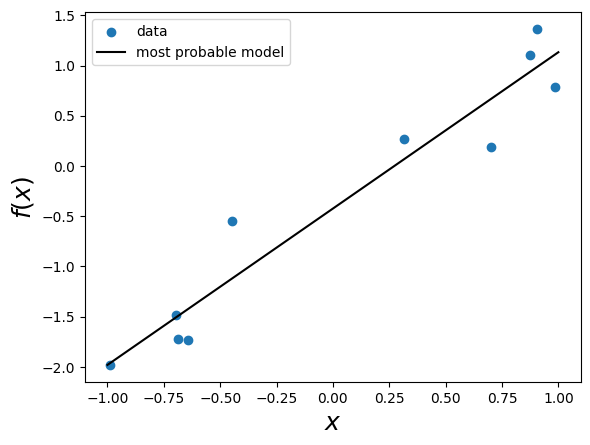

In [9]:
x_grid = np.linspace(-1., 1., 100)
X_grid = np.column_stack((x_grid,np.ones_like(x_grid)))

plt.scatter(data[0][:,0],data[1],label='data')

mean,_ = calculate_posterior_params(data)
y_pred = X_grid @ mean # Represents the data likelihood
plt.plot(x_grid,y_pred,c='k',label='most probable model')

plt.legend()
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)


Text(0, 0.5, '$f(x)$')

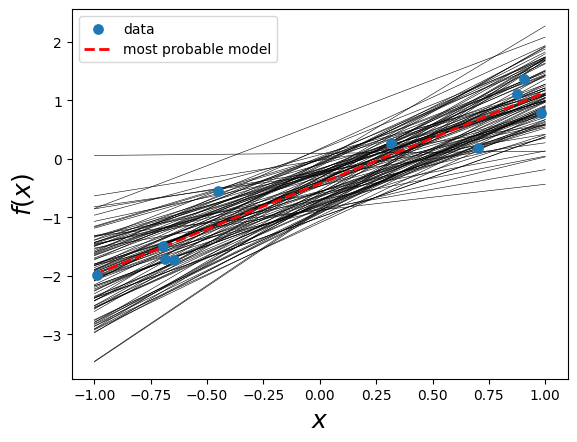

In [12]:
mean,std = calculate_posterior_params(data)
random_theta = np.random.multivariate_normal(mean,std,100)

plt.figure(0)
plt.scatter(data[0][:,0],data[1],label='data',zorder=3.5,s=45)
plt.plot(x_grid, X_grid @ mean, c='r',
         label='most probable model', ls='--',lw=2., zorder=2.5)
for t  in random_theta:
    y_pred = X_grid @ t
    plt.plot(x_grid,y_pred,c='k',lw=0.4)

plt.legend()
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x)$', fontsize=18)



*   **Blue Points:** These represent the actual observed data points.
  
*   **Black Lines:** Each of these represents a regression line sampled from the posterior distribution. They give a sense of the uncertainty in the regression model; where they are dense, there is more certainty about the model, and where they spread out, there is more uncertainty.

*   **Red Dashed Line:** This is the most probable regression line based on the mean of the posterior distribution.

Text(0, 0.5, '$\\theta_0$')

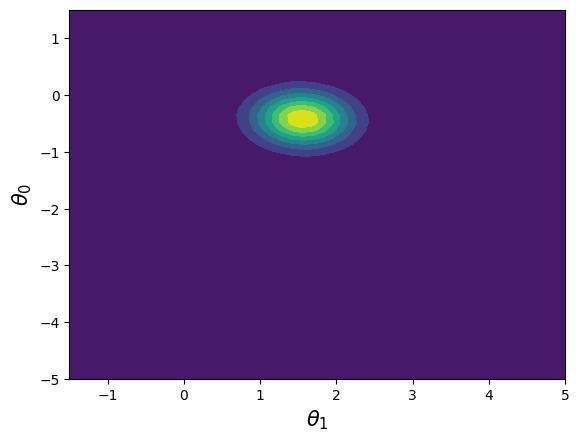

In [14]:
from scipy.stats import multivariate_normal
theta1, theta0 = np.meshgrid(
    np.linspace(-1.5, 5, 50), np.linspace(-5,1.5 , 50))
pos = np.empty(theta0.shape + (2,))
pos[:, :, 0] = theta1; pos[:, :, 1] = theta0
rv = multivariate_normal(mean=mean, cov=std)

plt.contourf(theta1, theta0, rv.pdf(pos))
plt.xlabel(R'$\theta_1$',fontsize=15)
plt.ylabel(R'$\theta_0$', fontsize=15)

The code and the resulting graph are a way to visualize a bivariate (two-variable) normal distribution which represents the possible values for two parameters, typically $\theta_0 $ and $\theta_1 $, in a Bayesian regression model. Let's break it down to understand better:

### **Understanding the Code**

1. **Multivariate Normal Distribution:**
   - The code defines a multivariate normal distribution using `mean` and `std`.

2. **Meshgrid:**
   - The meshgrid created by `np.meshgrid` is a grid of points where the distribution is evaluated. Think of it like laying a net over a region where you expect to find fish; where the fish are the values of $\theta_0 $ and $\theta_1 $.

3. **Probability Density Function (PDF):**
   - The `rv.pdf(pos)` computes the probability density at each point on the grid. The denser the points, the more likely the values at that point are the true parameter values.


The graph is used to create a visual representation of where the model believes the true parameter values are likely to be based on the data and prior information. The graph shows these beliefs in a way that can be easily understood.

## **Next Week - Gaussian Processes in Regression**

Building off Bayes' Theorem in Regression, the Gaussian Processes in Regression

- **Gaussian Process Definition**:
  - A Gaussian Process (GP) is a collection of random variables, any finite number of which have a joint Gaussian distribution. In the context of regression, a GP can be used to define a distribution over functions.
  - A GP is fully specified by its mean function, $\ m(x) $, and covariance function, $\ k(x, x') $, such that:
  
    $$
    \ f(x) \sim \{GP}(m(x), k(x, x'))
    $$
  - Where:
    - $f(x)$ is a random function that is distributed according to the Gaussian process.
    - $m(x)$ is the mean function, often assumed to be zero in the absence of prior knowledge.
    - $k(x, x')$ is the covariance function, also known as the kernel, which defines the shape of the function space and the smoothness of the functions.

<br>

![Gaussian Process Regression Visualization](https://simple-complexities.github.io/assets/images/gaussian_process_regression.gif) <br>
[**Figure 2 - Gaussian Process Regression Visualization. Image by Ameya Daigavane**](https://simple-complexities.github.io/optimization/gaussian/processes/bayesian/2020/03/16/gaussian-processes.html)






```python
from pyscf import gto, scf, mcscf, dft
import numpy as np

def get_energy(r):
  # r  is the N-N distance in the z-axis
  mol = gto.M(atom='N 0 0 0; N 0 0 %.3f'%(r), basis='6-311g')
  mf = dft.RKS(mol, xc="b3lyp").density_fit().run()
  energy = mf.kernel()
  return energy
```

> The data was collected and stored using this code snippet.

,R,Energy
0,0.500000,-103.911369
1,0.520202,-104.619753
2,0.540404,-105.244397
3,0.560606,-105.820082
4,0.580808,-106.300665
...,...,...
95,2.419192,-108.947723
96,2.439394,-108.943596
97,2.459596,-108.939373
98,2.479798,-108.935455


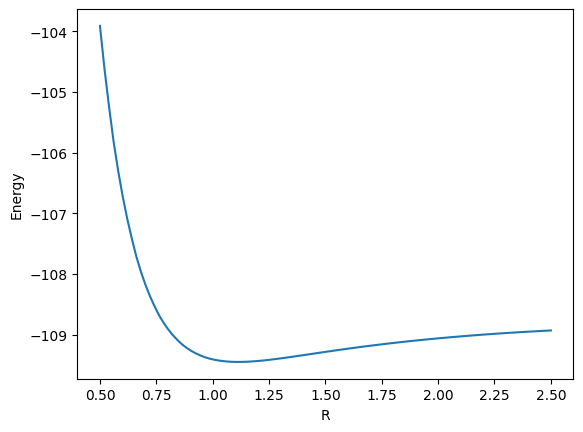

In [20]:
data_url = "https://github.com/RodrigoAVargasHdz/CHEM-4PB3/raw/main/Course_Notes/data/PES_N2"
data = pd.read_csv(data_url)
plt.plot(data['R'],data['Energy'])

plt.xlabel('R')
plt.ylabel('Energy')

data

**Resources:**
- **Gaussian Processes**: [Official Documentation](https://scikit-learn.org/stable/modules/gaussian_process.html)
- **A Visual Exploration of Gaussian Processes**: [Online Course](https://distill.pub/2019/visual-exploration-gaussian-processes/)
- **A tutorial on Gaussian process regression: Modelling, exploring, and exploiting unknown functions**: [Journal Article](https://www.biorxiv.org/content/10.1101/095190v3)

These resources are a great starting point for anyone looking to understand Gaussian processes and their application in regression and machine learning tasks.

## **Homework - Applying Probabilistic Regression to Synthetic Potential Energy Surfaces (PES)**

A **Potential Energy Surface** **(PES)** is a multidimensional surface that represents the energy of a system, typically of a molecule, as a function of the positions of its nuclei. It is crucial for understanding molecular dynamics and reactions, as it depicts how the potential energy changes with the molecular geometry and guiding the pathways of chemical transformations.

<br>

![Potential Energy Surface (PES) Visualization](https://www.researchgate.net/profile/Stanislaw-Waclawek/publication/351126865/figure/fig1/AS:1017564494848001@1619617689779/a-Model-potential-energy-surface-showing-an-example-of-a-reaction-path-minima-and.jpg) <br>
[**Figure 4 - Potential Energy Surface (PES) Visualization. Image by Stanisław Wacławek**](https://www.researchgate.net/figure/a-Model-potential-energy-surface-showing-an-example-of-a-reaction-path-minima-and_fig1_351126865)

<br>

> Given a synthetic dataset, fit a Bayesian Regression line of the $7th$ order.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a synthetic dataset
np.random.seed(42)  # Seed for reproducibility
R = np.linspace(0.5, 2.5, 100)  # Inter-nuclear distances
true_energy = -100 / R + 10  # Hypothetical true energy function
noise = np.random.normal(0, 1, size=R.shape)  # Noise in measurements
measured_energy = true_energy + noise  # Energy with simulated measurement noise

# Create a DataFrame
data = pd.DataFrame({'R': R, 'Energy': measured_energy})
data


,R,Energy
0,0.500000,-189.503286
1,0.520202,-182.371274
2,0.540404,-174.399040
3,0.560606,-166.855349
4,0.580808,-162.408066
...,...,...
95,2.419192,-32.799632
96,2.439394,-30.697669
97,2.459596,-30.396029
98,2.479798,-30.320752


In [ ]:
# Your Code Here